<a href="https://colab.research.google.com/github/IamHeeJ/ML_Ex/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**과제 1.**

타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

##**공지**

기본값으로 모델을 생성하고, 최적화를 진행할 것.

* random_state는 자신의 학번으로 설정.

입력 데이터도 적절히 수정할 것.

* NaN(Not A Number) 값을 어떻게 처리했는가?

* 왜 이렇게 훈련 및 테스트 세트를 만들었는가?

수행한 최적화 방법을 단계별로 자세히 설명할 것.

* 왜 이런 파리미터를 수정하는가?

* 왜 이렇게 파라미터 범위를 정했는가?

* 왜 이런 파라미터를 최종적으로 선택했는가?

위에 언급한 것 말고도 다양한 방법을 사용해 볼 것.

모델을 만들고 난 후에도 필요하면 입력 데이터를 수정하여 다시 모델을 만들 수 있음.

* 특성 공학 이용
---

**주의!!!**

다운받은 파일 수정 금지 및 모든 데이터 사용할 것.

그러나 변수로 지정된 데이터는 수정가능.

파일 /content/drive/MyDrive/Colab Notebooks/에 업로드하여 사용할 것.

* 예) titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

random_state는 자신의 학번으로 설정.

10/15일까지 자신의 GitHub에 업로드할 것.

---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data

##데이터 전처리

**데이터 병합**

- merge() : test.csv 파일에 gender_submission.csv 파일의 survived 속성을 추가해준다.

- concat() : test.csv 파일과 train.cvs 파일을 병합한다.

**데이터 변환**

- fillna(0) : Nan값을 0으로 변환

- 딥러닝 연산을 위해 Sex 속성을 문자열에서 숫자로 변환해줘야 함   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import glob
import os

test_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/titanic/test.csv')
train_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/titanic/train.csv')
GS_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/titanic/gender_submission.csv')

# passenger, survived, Pclass, Name, Sex, Age, Sib


# pandas의 merge 함수를 이용하여 gender_submission의 survived 속성을 test.csv에 추가한다.
merge_test = pd.merge(GS_csv, test_csv, how='outer',on='PassengerId')

# pandas의 concat 함수를 이용하여 위에서 merge한 test와 train 파일을 합친다 => 합친 데이터명은 titanic
titanic = pd.concat([train_csv, merge_test])

titanic = titanic.fillna(0)                         # Nan값을 0으로 바꾸어 처리한다.
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0    # Sex = male이면 0으로 변환
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1  # Sex = female이면 1로 변환

print(titanic)

# passenger, survived,    Pclass,        Name, Sex, Age, SibSp,  Parch,  Ticket,  Fare, Cabin, Embarked
# 승객번호,  0사망/1생존, 티켓클래스1/2/3                형제 수 부모 수 티켓번호 표값  객실   하역항

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris   0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
2                               Heikkinen, Miss. Laina   1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
4                             Allen, Mr

##SGD 분류 (SGD Classifier)

**확률적 경사 하강법(Stochastic Gradient Descent, SGD)**

- 대표적 점진적 학습 알고리즘
- 경사 하강법을 수행할 때 훈련셋의 모든 데이터가 아닌, 랜덤한 1개의 샘플을 골라 가파른 경사를 조금 내려가는 방법
- 전체 샘플을 모두 사용할 때까지 계속함


partial_fit()
- 모델을 이어서 훈련시키는 메서드
- fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련함

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# 생존 여부와 관련있는 속성들을 input 데이터로 사용
titanic_input = titanic[['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].to_numpy()
# 생존여부를 target값으로 사용
titanic_target = titanic['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    titanic_input, titanic_target, random_state=202139829)

print(train_input.shape, test_input.shape) # 훈련셋 981개, 테스트셋 328개

(981, 6) (328, 6)


In [4]:
# 데이터 스케일링
# 특성을 표준화 전처리하여 특성값의 스케일을 맞춤
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# SGD분류 모델(sc) 훈련

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=202139829)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8583078491335372
0.8567073170731707


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


##결정 트리 (Decision Tree)

DecisionTreeClassifier 클래스 사용하여 결정 트리 모델 훈련

기존 모델 훈련 방법과 같음

- fit() 메서드로 모델 훈련
- score() 메서드로 정확도 평가

**plot_tree() 트리**
- 결정 트리 모델을 그림으로 출력

**max_depth 매개변수**
- 결정 트리를 가지치기 해줌
- 루트 아래로 최대 n개의 노드까지만 출력하도록 만듬

**feature_importances_ 속성**
- 결정 트리의 속성으로, 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 줌

In [7]:
# 로지스틱 회귀 모델(lr) 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.855249745158002
0.850609756097561


In [8]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[ 1.80527165 -0.30296533 -0.84405048 -0.16989066 -0.07784787  0.05975833]] [-0.792315]


In [9]:
# 결정 트리
# 질문을 추가하여 분류 정확도를 높이기
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202139829)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))  # 훈련 세트
print(dt.score(test_scaled, test_target))    # 테스트 세트

# 과대 적합

0.9785932721712538
0.8201219512195121


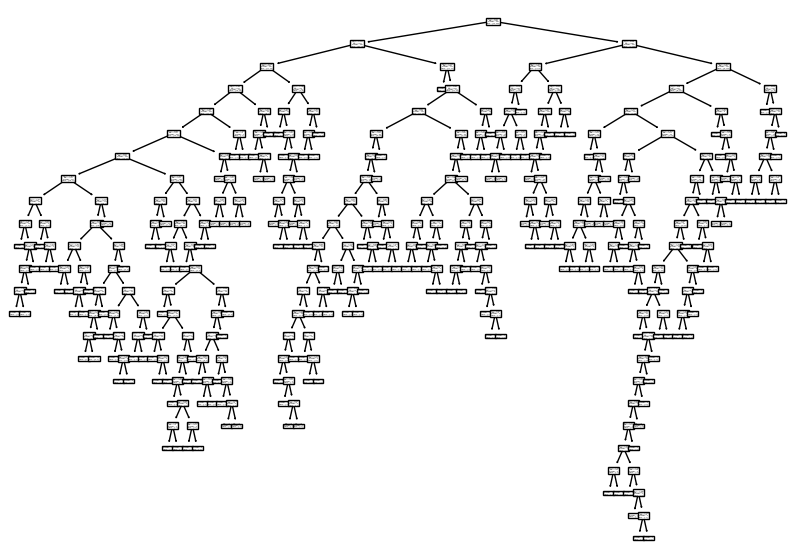

In [10]:
# 결정 트리 모델 객체 그리기 - plo_tree()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

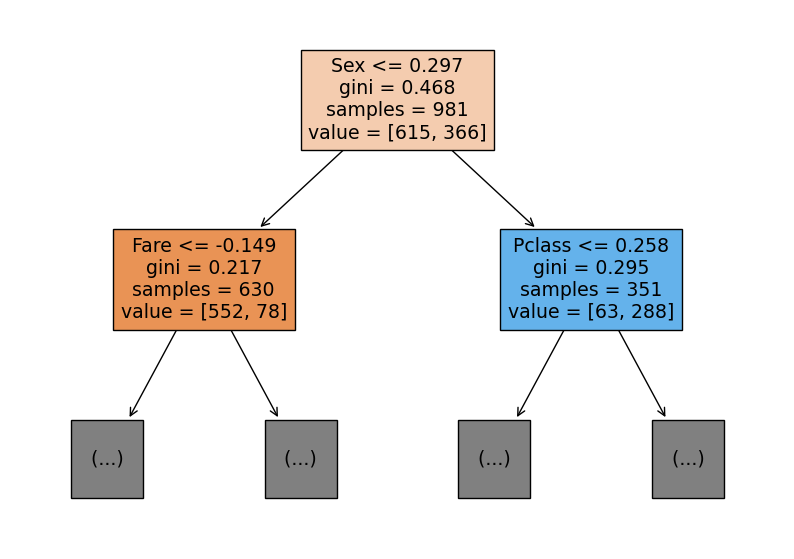

In [11]:
# 트리의 깊이를 제한하여 구체적으로 출력해보기
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [12]:
# 트리 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=202139829)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 훈련셋 점수 하락, 테스트셋 점수 향상

0.8685015290519877
0.8719512195121951


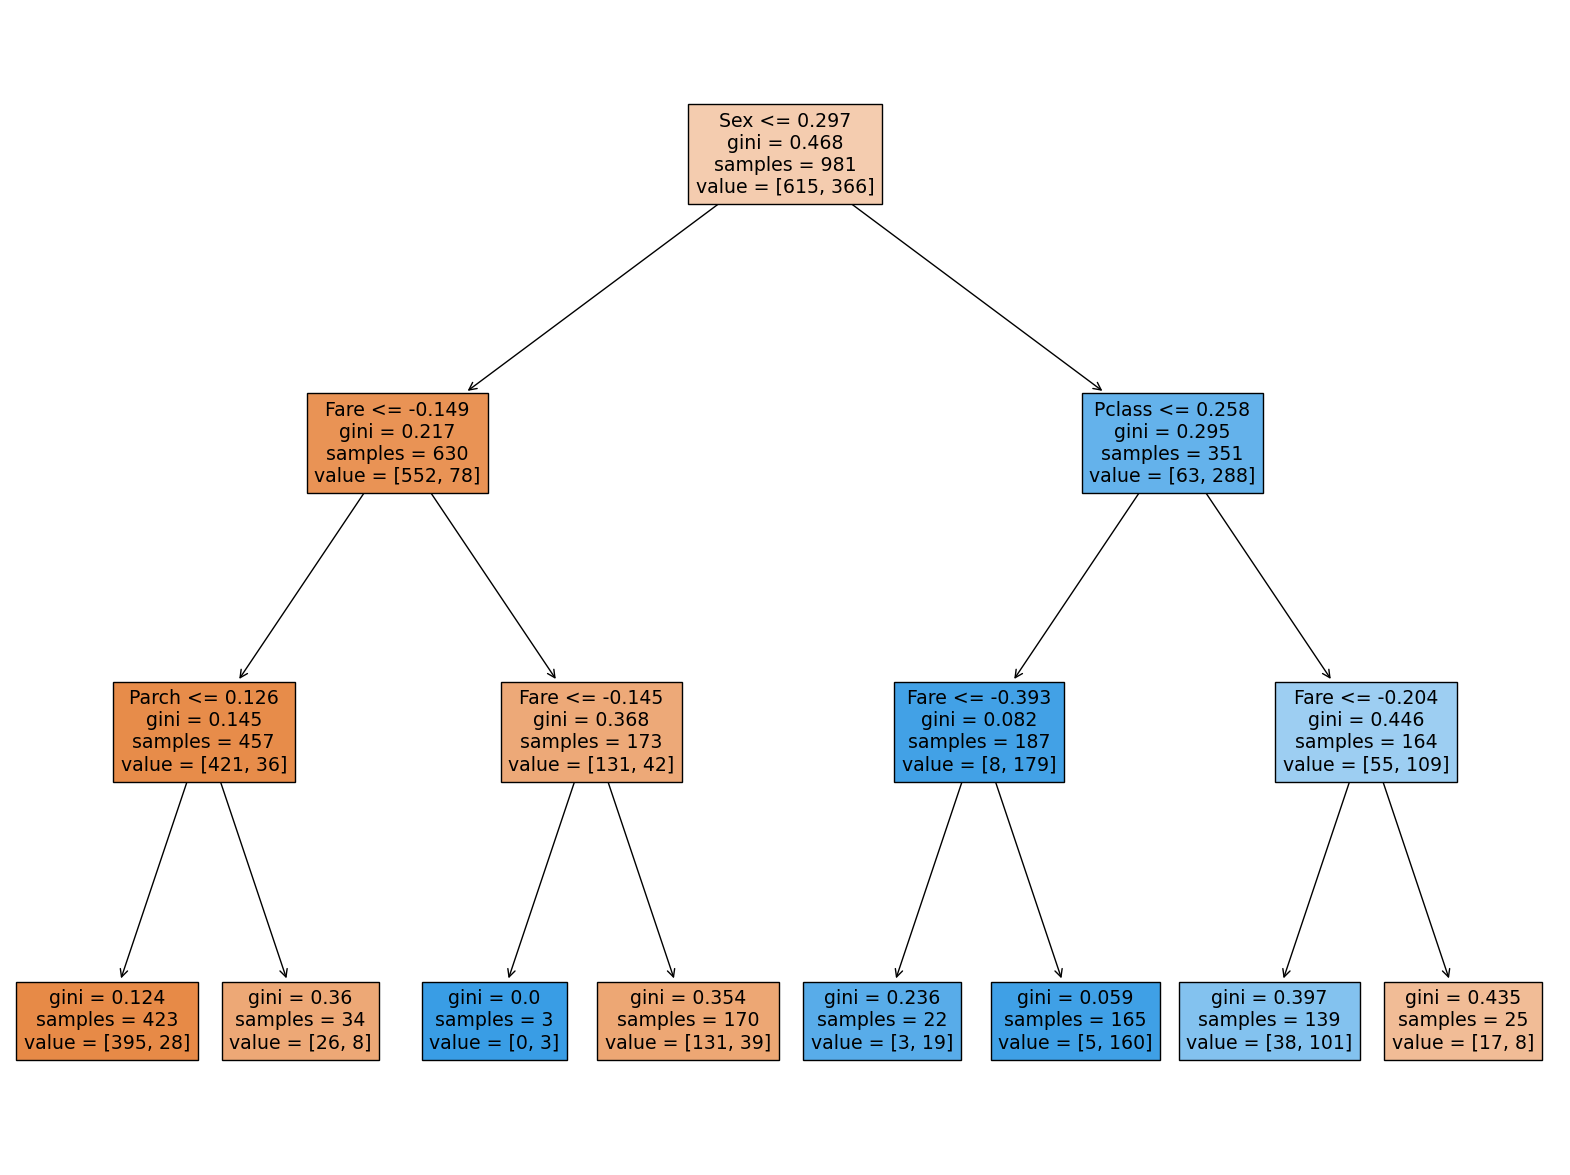

In [13]:
# 가지치기 후의 결정 트리 출력
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])
plt.show()

# 깊이 0, 1, 2, 3까지만 출력됨

전처리 하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 다시 훈련하기

- 특성값 스케일은 결정 트리 알고리즘에 영향을 미치지 않으므로, 결정 트리는 표준화 전처리 과정이 필요 없음
- 특성값을 표준점수(마이너스 포함)로 바꾸지 않아서 이해하기 더 쉬움

0.8685015290519877
0.8719512195121951


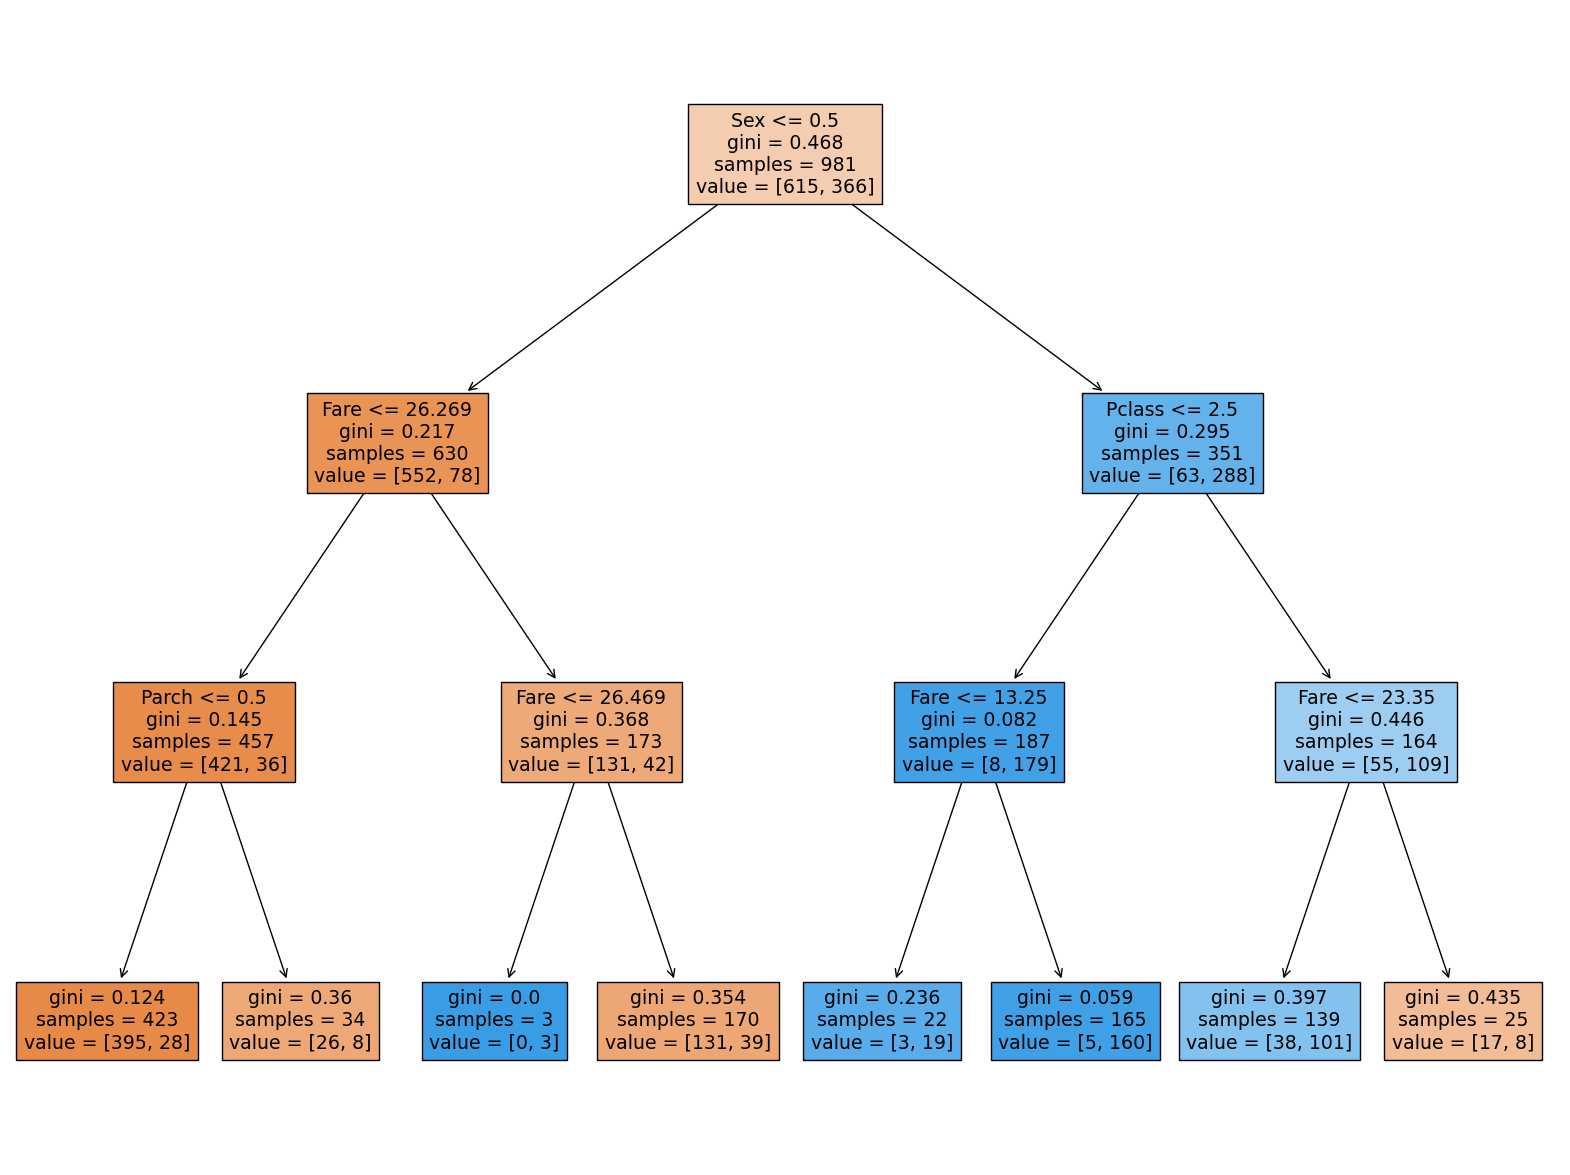

In [14]:
# 이해하기 쉬운 결정 트리 모델로 다시 출력하기

dt = DecisionTreeClassifier(max_depth=3, random_state=202139829)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])
plt.show()


In [15]:
# 특성 중요도 출력 - 결정 트리 모델의 feature_importances_속성
print(dt.feature_importances_)

# ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'] 순서

[0.86396953 0.         0.05906182 0.         0.00710584 0.06986281]


특성 중요도는 Sex(0.86396953), Fare(0.06986281), Pclass(0.05906182) 순으로 높다

##랜덤 포레스트 (Random Forest)

결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만들고 각 결정트리의 예측을 사용해 최종 예측을 만듬
- 각 트리를 훈련하기 위한 데이터를 랜덤하게 만듬(중복 가능성 있음) => "부트스트랩 샘플"
- 각 노드를 분할할 때 전체 특성 중 일부 특성을 무작위로 고르고, 그중 최선의 분할을 찾음
  - RandomForestClassifier(분류) : 기본적으로 전체 특성 개수의 제곱근만큼의 특성 선택
  - RandomForestRegressor(회귀) : 전체 특성을 사용함

- 클래스 예측
  - 분류 : 각 트리의 클래스별 확률을 평균하여 가장 높은 확률 가진 클래스를 예측으로 삼음
  - 회귀 : 단순히 각 트리의 예측을 평균

**RandomForestClassfier**

- n_jobs : -1로 지정하여 모든 CPU 코어 사용

- return_train_score : True로 지정하여 검증 점수와 훈련 점수 같이 반환 (기본값은 False)

In [16]:
# RandomForestClassifier로 분류하기
# 교차 검증 수행하기 - cross_validate()
# train, test 세트는 기존의 것을 사용

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202139829)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

# 과대 적합

0.9821610555050047
0.8338236817569668


In [17]:
# 훈련한 랜덤 포레스트 모델의 특성 중요도 출력

rf.fit(train_input, train_target)
print(rf.feature_importances_)
# ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'] 순서

[0.43250711 0.19595819 0.05306382 0.03794136 0.03550012 0.24502941]


앞의 결정 트리에서 만든 특성 중요도와 비교하기

[0.86396953 0.         0.05906182 0.         0.00710584 0.06986281]

=> Sex, Pclass가 감소하고 Parch, Fare가 상승함

.

이런 결과가 나타나는 이유?

- 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정트리를 훈련하기 때문
- 한 특성에 과도하게 집중하지 않고 더 많은 특성이 훈련됨
- 과대적합 줄이고 일반화 성능 강화

---

**OOB(out of bag) 샘플**

- 결정 트리 훈련 시 부트스트랩 샘플에 포함되지 않고 남는 샘플

- OOB를 사용하여 부트스트랩 샘플로 훈련한 결정트리를 평가할 수 있음 => 마치 검증셋 역할!!

- oob_score 매개변수를 True로 지정하여 사용 (기본값 False)

- OOB 점수를 사용하면 교차 검증 대신하 수 있어서 훈련셋에 더 많은 샘플을 사용할 수 있음

In [18]:
# OOB를 사용하여 결정트리 평가
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=202139829)

rf.fit(train_input, train_target)
print(rf.oob_score_)

# 교차 검증 때 얻은 점수와 비슷함

0.8277268093781855


##히스토그램기반 그래디언트 부스팅 (Histogram-based Gradient Boosting)

**그래디언트 부스팅(Gradient Boosting)**

깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블하는 방법

과대적합에 강하고 일반화 성능 높음

경사하강법 사용 - 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동

- 분류 : 로지스틱 손실 함수 사용
- 회귀 : 평균 제곱 오차 함수 사용

순서대로 트리를 추가하기 때문에 훈련 속도가 느림 (n_jobs 매개변수x)

.

**히스토그램 기반 그래디언트 부스팅(Histogram-based Gradient Boosting)**

그래디언트 부스팅을 개선한 알고리즘, 정형 데이터에 가장 많이 사용

입력 특성을 256개의 구간으로 나눠 노드 분할할 때 최적의 분할을 빠르게 찾음

누락된 값도 다루기 때문에 누락된 특성을 전처리할 필요 없음

.

**HistGradientBoostingClassifier**

- max_iter : 트리 개수 지정

permutation_importance()

- 히스토그램 기반 그래디언트 부스팅의 특성 중요도 계산
- n_repeats : 랜덤하게 섞을 횟수 지정 (기본값 5)


In [19]:
# 히스토그램 기반 그래디언트 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202139829)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

# 과대적합

0.9587137657610814
0.8317828654304362


In [20]:
# 훈련셋의 특성 중요도 계산
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=202139829, n_jobs=-1)
print(result.importances_mean)

# ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'] 순서

[0.31060143 0.10010194 0.05443425 0.02038736 0.01172273 0.09826707]


=> Sex, Age, Fare 순서대로 높은 특성 중요도를 보이고 있음

In [21]:
# 테스트셋의 특성 중요도 계산
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=202139829, n_jobs=-1)
print(result.importances_mean)

# ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'] 순서

[0.27560976 0.03597561 0.04512195 0.0097561  0.01158537 0.01615854]


=> Sex, Pclass, Age 순서로 높은 특성 중요도를 보이고 있음

In [22]:
# 테스트셋에서의 성능 최종 확인

hgb.score(test_input, test_target)

0.8628048780487805